<a href="https://colab.research.google.com/github/RealMyeong/Going_Deeper_NLP/blob/main/%ED%95%9C%EC%98%81_%EB%B2%88%EC%97%AD%EA%B8%B0%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

In [37]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontcon

In [38]:
# # Mecab 설치
# !apt-get update
# !apt-get install g++ openjdk-8-jdk 
# !pip3 install konlpy JPype1-py3
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [39]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [40]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
import time
import re
import os
import io

In [41]:
en_file_path = '/content/drive/MyDrive/AIFFEL/GoingDeeper_NLP/8_한영번역기/korean-english-park.train/korean-english-park.train.en'
ko_file_path = '/content/drive/MyDrive/AIFFEL/GoingDeeper_NLP/8_한영번역기/korean-english-park.train/korean-english-park.train.ko'

In [42]:
with open(en_file_path, "r") as f:
    en_raw = f.read().splitlines()

print("Data Size:", len(en_raw))
print("Example:")

for sen in en_raw[0:10]: 
  print(">>", sen)

Data Size: 94123
Example:
>> Much of personal computing is about "can you top this?"
>> so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable, wireless mouse.
>> Like all optical mice, But it also doesn't need a desk.
>> uses gyroscopic sensors to control the cursor movement as you move your wrist, arm, whatever through the air.
>> Intelligence officials have revealed a spate of foiled plots on ships in Southeast Asia and are warning that a narrow stretch of water carrying almost one third of the world's maritime trade is vulnerable to a terror attack.
>> After learning of several foiled al Qaeda attempts on U.S. and commercial ships in the area, experts are warning that the terror network still wants to cripple the global economy, the world's economic jugular vein in Southeast Asia is at risk.
>> Caffeine can help increase reaction time and improve performance for military servicemen who must perform complex tasks or who need help sta

In [43]:
with open(ko_file_path, 'r') as f:
  ko_raw = f.read().splitlines()

print('Data size: ', len(ko_raw))
print('Example: ')

for sen in ko_raw[0:10]:
  print('>>', sen)

Data size:  94123
Example: 
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.
>> 그러나 이것은 또한 책상도 필요로 하지 않는다.
>> 79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.
>> 정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.
>> 이 지역에 있는 미국 선박과 상업용 선박들에 대한 알카에다의 (테러) 시도 중 여러 건이 실패했다는 것을 알게 된 후에, 전문가들은 테러 조직이 여전히 세계 경제에 타격을 입히려 한다고 경고하고 있으며, 동남 아시아에 있는 세계 경제의 주요 통로가 위험에 처해 있다고 그들은 생각하고 있다.
>> 국립 과학 학회가 발표한 새 보고서에따르면, 복잡한 임무를 수행해야 하는 군인들이나 보다 오랜 시간 동안 경계를 늦추지 않고 있기 위해 도움이 필요한 군인들에게 카페인이 반응 시간을 증가시키고 임무 수행 능력을 향상시키는데 도움이 된다고 한다.
>> 이 보고서에따르면, "특히, 군사 작전에서 생사가 걸린 상황이 될 수도 있는 반응 속도와 시각 및 청각의 경계 상태를 유지시키기 위해 카페인이 사용될 수도 있다." 고 한다.
>> "결정적인 순간에 그들의 능력을 증가시켜 줄 그 무엇이 매우 중요합니다."
>> 연구가들이 이미 커피 대체품으로서 음식 대용 과자나 껌에 카페인을 첨가하는 방법을 연구하고 있다고 Archibald는 말했다.


In [44]:
sen_zip = zip(ko_raw, en_raw)
sen_zip = set(sen_zip)
cleaned_ko, cleaned_en = zip(*sen_zip)
print(len(cleaned_ko), len(cleaned_en))

78968 78968


In [45]:
def preprocess_sentence(sentence, s_token=False, e_token=False, ko=False):
    if ko:
      sentence = sentence.strip()
      sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
      sentence = re.sub(r'[" "]+', " ", sentence)
      sentence = re.sub(r"[^0-9a-zA-Z가-힣?.!,]+", " ", sentence)
      sentence = sentence.strip()

    else:
      sentence = sentence.lower().strip()
      sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
      sentence = re.sub(r'[" "]+', " ", sentence)
      sentence = re.sub(r"[^0-9a-zA-Z?.!,]+", " ", sentence)

      sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence

In [46]:
cleaned_ko = [preprocess_sentence(x, ko=True) for x in cleaned_ko]
cleaned_en = [preprocess_sentence(x, s_token=True, e_token=True) for x in cleaned_en]

In [47]:
# 한 문장 내에 중복되는 단어들을 제거해줌.

def drop_duplicates_in_sen(sen):
  sen = sen.split()
  drop_dup_sen = []
  dup_sen = []
  for i in sen:
    if i not in drop_dup_sen:
      drop_dup_sen.append(i)
  sen = ' '.join(drop_dup_sen)

  return sen

In [48]:
non_dup_ko = [drop_duplicates_in_sen(x) for x in cleaned_ko]

In [49]:
non_dup_en = [drop_duplicates_in_sen(x) for x in cleaned_en]

In [50]:
non_dup_ko[1]

'년전 고대 히브리어 글 발견'

In [51]:
non_dup_en[1]

'<start> archeologist finds , year old hebrew text <end>'

- 한글 문장 길이 분포 확인

문장의 최단 길이 :  0
문장의 최장 길이 :  242
문장의 평균 길이 :  58


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


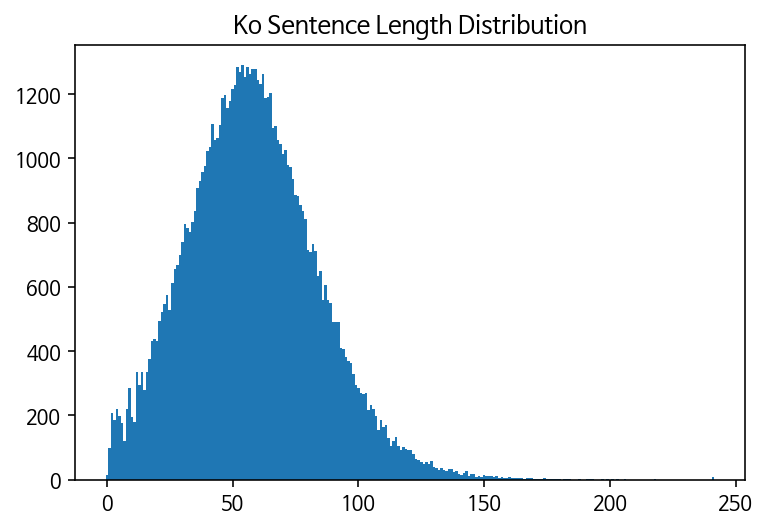

In [52]:
%matplotlib inline

min_len = 999
max_len = 0
sum_len = 0

for sen in non_dup_ko:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(non_dup_ko))

sentence_length = np.zeros((max_len), dtype=np.int)

# 길이가 같은 문장의 개수
for sen in non_dup_ko:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title('Ko Sentence Length Distribution')
plt.show()

- 길이가 0인 문장이 존재함. 몇 개의 문장이 길이가 0인지 확인하고 인덱스 기억.
- 해당하는 인덱스 한글, 영어 리스트에서 전부 삭제
- 그리고 분포를 보면 모양이 좋음. 최대 길이 150이상인것들만 제거해줄예정, 또한 길이가 6미만인 문장들도 삭제

- 영어 문장 길이 분포 확인

문장의 최단 길이 :  13
문장의 최장 길이 :  544
문장의 평균 길이 :  138


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


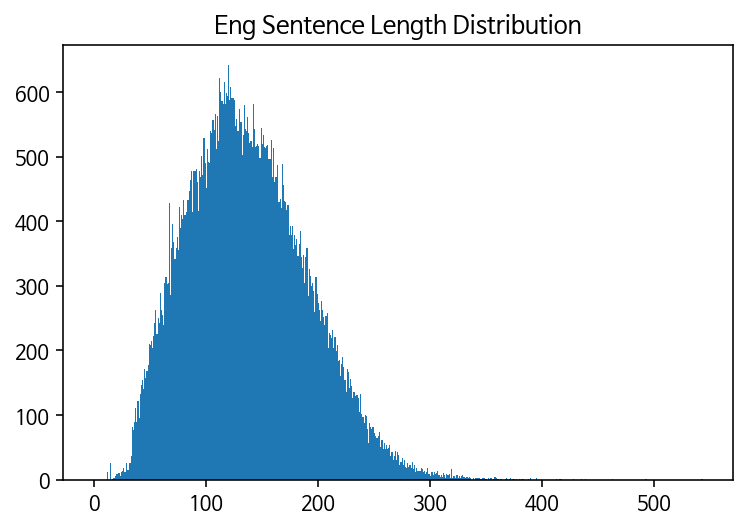

In [53]:
%matplotlib inline

min_len = 999
max_len = 0
sum_len = 0

for sen in non_dup_en:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(non_dup_en))

sentence_length = np.zeros((max_len), dtype=np.int)

# 길이가 같은 문장의 개수
for sen in non_dup_en:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title('Eng Sentence Length Distribution')
plt.show()

In [54]:
zero_len_cnt = 0
drop_idx_list = []
for idx, sen in enumerate(non_dup_ko):
  if len(sen) == 0:
    zero_len_cnt += 1
    drop_index = (idx)
    drop_idx_list.append(drop_index)

print(zero_len_cnt)
print(drop_idx_list)

8
[9025, 17918, 22260, 31508, 35873, 43256, 55656, 68869]


In [55]:
for i in drop_idx_list:
  del non_dup_ko[i]
  del non_dup_en[i]

print(len(non_dup_ko))
print(len(non_dup_en))

78960
78960


In [56]:
kor_corpus = []
eng_corpus = []

for kor, eng in zip(non_dup_ko, non_dup_en):
    if 1 <= len(kor) <= 400 and 1 <= len(eng) <= 600:
        kor_corpus.append(kor)
        eng_corpus.append(eng)


# 남은 데이터 개수 확인
print(len(kor_corpus))
print(len(eng_corpus))

78953
78953


- 토큰화 후의 길이 분포 확인

In [57]:
from konlpy.tag import Mecab

mecab = Mecab()
ko_token = [[len(mecab.morphs(sen)),idx] for idx, sen in enumerate(kor_corpus)]
en_token = [[len(sen.split()),idx] for idx, sen in enumerate(eng_corpus)]

print('한국어 문장 최대 토큰 개수 : ',max(ko_token))
print('영어 문장 최대 토큰 개수 : ', max(en_token))
print('한국어 문장 최소 토큰 개수 : ', min(ko_token))
print('영어 문장 최소 토큰 개수 : ', min(en_token))


한국어 문장 최대 토큰 개수 :  [109, 67704]
영어 문장 최대 토큰 개수 :  [82, 47490]
한국어 문장 최소 토큰 개수 :  [1, 6]
영어 문장 최소 토큰 개수 :  [2, 1331]


- 한국어 문장 기준 토큰의 개수가 3개 미만, 50개 초과인 데이터는 사용하지 않겠습니다.
- 또한 영어 문장은 시작 토큰, 마무리 토큰 2개가 모든 문장에 있기 때문에 만약 토큰의 개수가 2개라면 삭제 해줍니다.

In [58]:
filtered_kor_corpus = []
filtered_eng_corpus = []

max_token_ko = 0
max_token_en = 0

for ko, en in zip(ko_token, en_token):
  if -5 <= (ko[0] - en[0]) <= 5 and en[0] > 2:
    filtered_kor_corpus.append(kor_corpus[ko[1]])
    filtered_eng_corpus.append(eng_corpus[en[1]])
    
    if max_token_ko < ko[0]:
      max_token_ko = ko[0]
    if max_token_en < en[0]:
      max_token_en = en[0]

In [59]:
print(max_token_ko)
print(max_token_en)
print(len(filtered_kor_corpus))
print(len(filtered_eng_corpus))

61
63
38382
38382


In [60]:
filtered_kor_corpus[10:15]

['보안 당국은 트리폴리 건물에서 명의 무장괴한들과 포로 수용인 명이 숨졌다고 전했다 .',
 ', 이수지',
 '이번 지원 자금은 팔레스타인 국민들의 세금으로 , 이스라엘이 하마스 세력의 확장을 막기 위해 동결 해 놨던 것이다 .',
 '중국의 대 강 가운데 하나인 후아이강에서는 앞으로 일간 홍수가 발생할 위험이 높다고 신화 통신이 보도했다 .',
 '팀 코나한 씨는 산타역을 년 동안 해왔습니다 .']

In [61]:
filtered_eng_corpus[10:15]

['<start> ten militants were killed in the building tripoli and seven refugee camp , security officials said . <end>',
 '<start> china tops world in internet users <end>',
 '<start> the money mostly customs duties that israel collects on behalf of palestinians has been withheld in an unsuccessful bid to pressure hamas recognize s right exist and renounce violence . <end>',
 '<start> the dykes that have soaked in high water level for days will be at an increased risk of breach coming , xinhua quoted official anhui province flood control headquarters as saying . <end>',
 '<start> tim connahan has played santa for forty years . <end>']

In [62]:
# 패딩 최대 길이
max_len = 63

def tokenize(corpus, ko=False):
    if ko:
      mecab = Mecab()
      morph = [(mecab.morphs(sen)) for sen in corpus]
      tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
      tokenizer.fit_on_texts(morph)
      tensor = tokenizer.texts_to_sequences(morph)
      # 인코더의 입력으로 들어가는 시퀀스는 역순으로 뒤집어서 넣어줌
      tensor = [list(reversed(sen)) for sen in tensor]
      tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen=max_len)

    else:
      tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
      tokenizer.fit_on_texts(corpus)

      tensor = tokenizer.texts_to_sequences(corpus)

      tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post', maxlen=max_len)

    return tensor, tokenizer

In [63]:
# 토큰화하기
enc_tensor, enc_tokenizer = tokenize(filtered_kor_corpus, ko=True)
dec_tensor, dec_tokenizer = tokenize(filtered_eng_corpus)

enc_train, enc_test, dec_train, dec_test = train_test_split(enc_tensor, dec_tensor, test_size=0.1)

print("Korean Vocab Size:", len(enc_tokenizer.index_word))
print("English Vocab Size:", len(dec_tokenizer.index_word))

Korean Vocab Size: 31275
English Vocab Size: 32442


In [64]:
enc_tensor[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     1,     2,     9,  1590,     8,
         499,   720,     6,   101,    29,    26,  1415,  9037,    55,
           9,   580,     8, 19190,  4917,  2255,     4,  6228,    86],
      dtype=int32)

In [65]:
dec_tensor[0]

array([   1,   67, 4685, 8281, 1584,    5,   26, 1229,   13,    4,  204,
        781, 2615, 7587, 4475,  275,  312,    9,   35,   42,   76,    6,
       1557,    3,    2,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

- 어텐션 클래스 정의

In [66]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

- 인코더 클래스 정의

In [67]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units, return_sequences=True)
		
    def call(self, x):
        x = self.embedding(x)

        output = self.gru(x)

        return output

- 디코더 클래스 정의

In [68]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units, return_sequences=True, return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.attention = BahdanauAttention(self.dec_units)
        
    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)

        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vec, 1), x], axis=-1)

        x, h_dec = self.gru(x)
        x = tf.reshape(x, (-1, x.shape[2]))
        x = self.fc(x)

        return x, h_dec, attn

- optimizer, loss 정의

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

- train step정의

In [70]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

In [71]:
from tqdm import tqdm    # tqdm
import random

EPOCHS = 50
BATCH_SIZE = 64
units = 600
embedding_dim = 1000
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

#loss 시각화를 위해 값을 저장할 리스트 생성
loss_val = []

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)    # tqdm

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                                dec_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer) 
        # loss값 따로 저장
        loss_val.append(batch_loss)
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))    # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))    # tqdm

Epoch 50: 100%|██████████| 600/600 [01:33<00:00,  6.45it/s, Loss 0.7691]


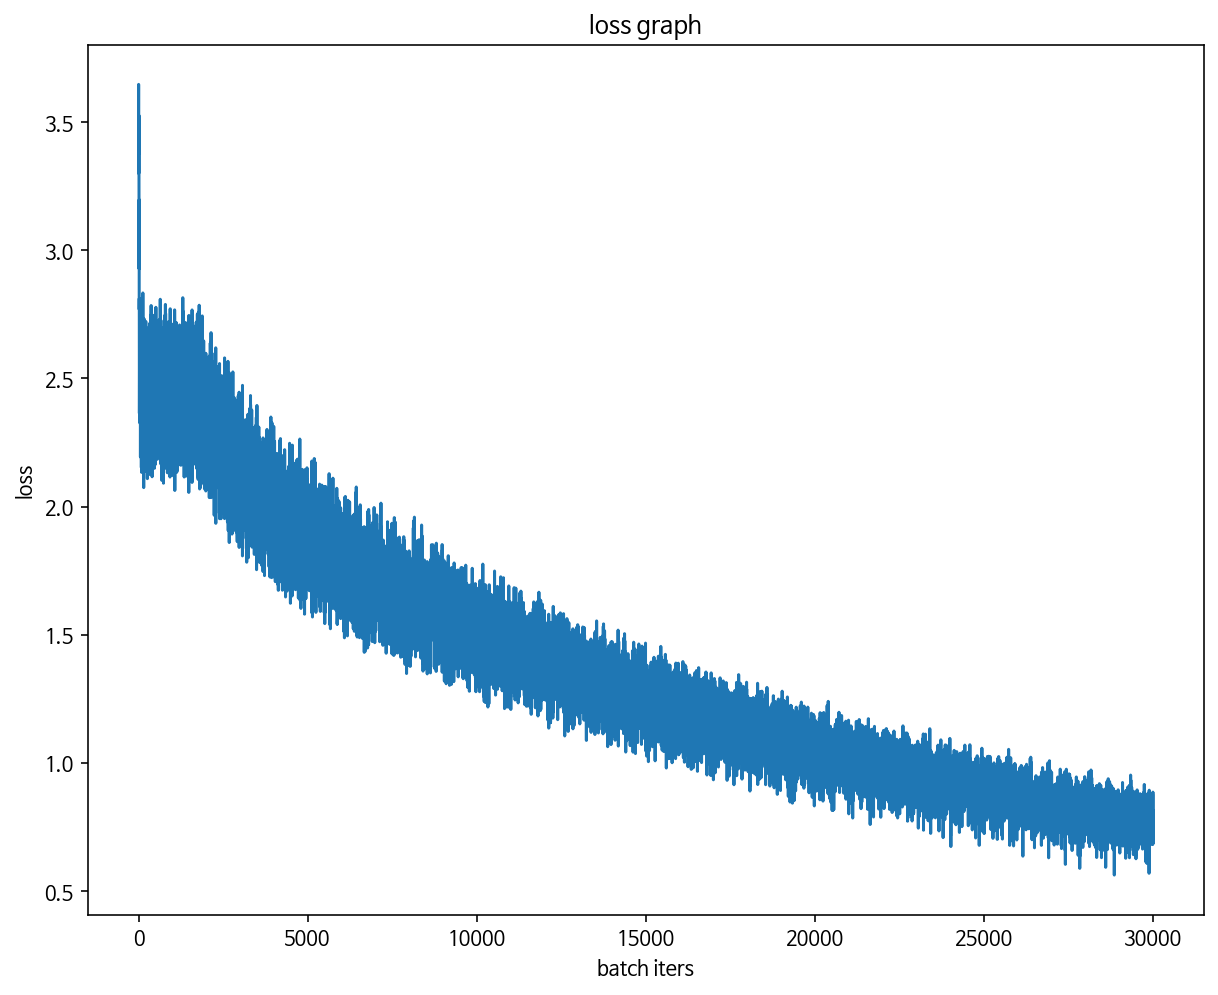

In [72]:
plt.figure(figsize=(10,8))
plt.plot(loss_val)
plt.title('loss graph')
plt.ylabel('loss')
plt.xlabel('batch iters')
plt.show()

In [73]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((dec_train.shape[-1], enc_train.shape[-1]))
    mecab = Mecab()
    sentence = preprocess_sentence(sentence, ko=True)
    inputs = enc_tokenizer.texts_to_sequences([mecab.morphs(sentence)])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc_train.shape[-1],
                                                           padding='pre')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec_train.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += dec_tokenizer.index_word[predicted_id] + ' '

        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    attention = attention[:len(result.split()), :len(sentence.split())]
    plot_attention(attention, sentence.split(), result.split(' '))


Input: 오바마는 미국 대통령이다 .
Predicted translation: . bush is reversing president bush <end> 


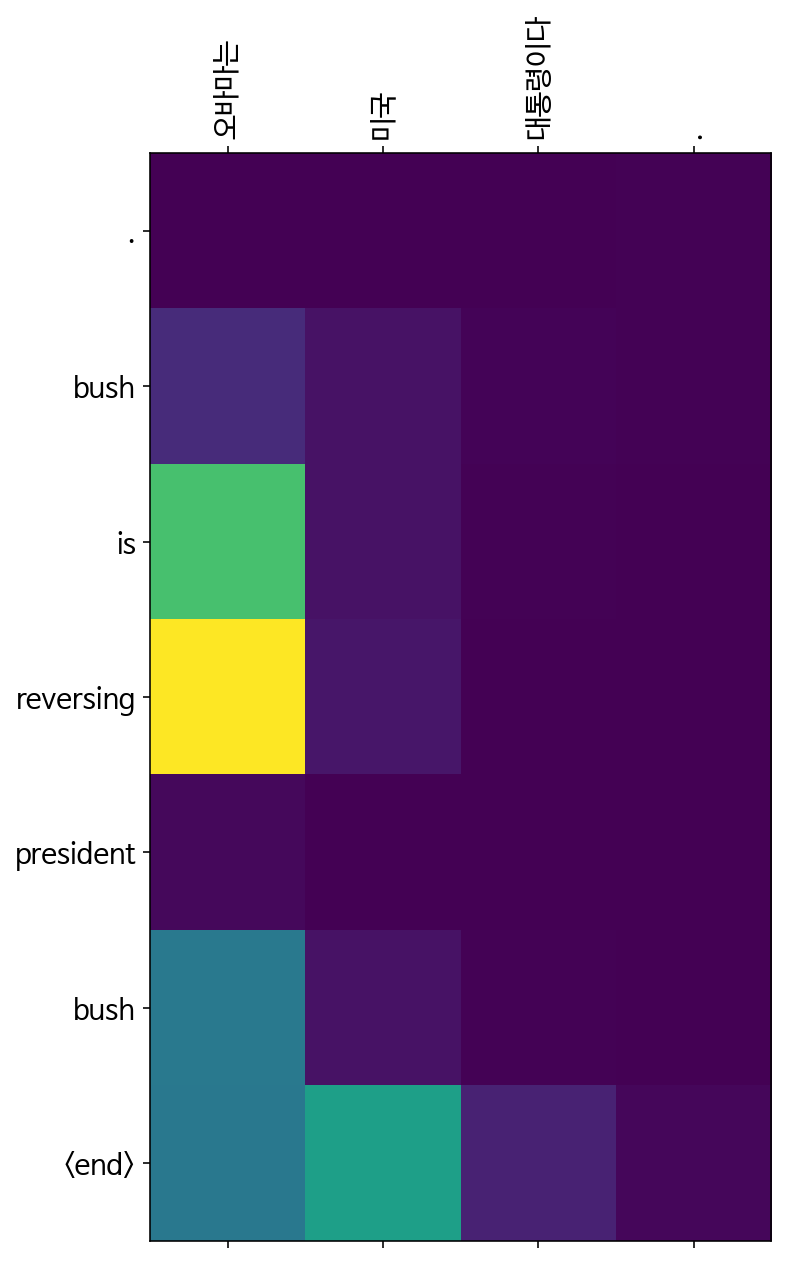

In [74]:
translate('오바마는 미국 대통령이다.', encoder, decoder)

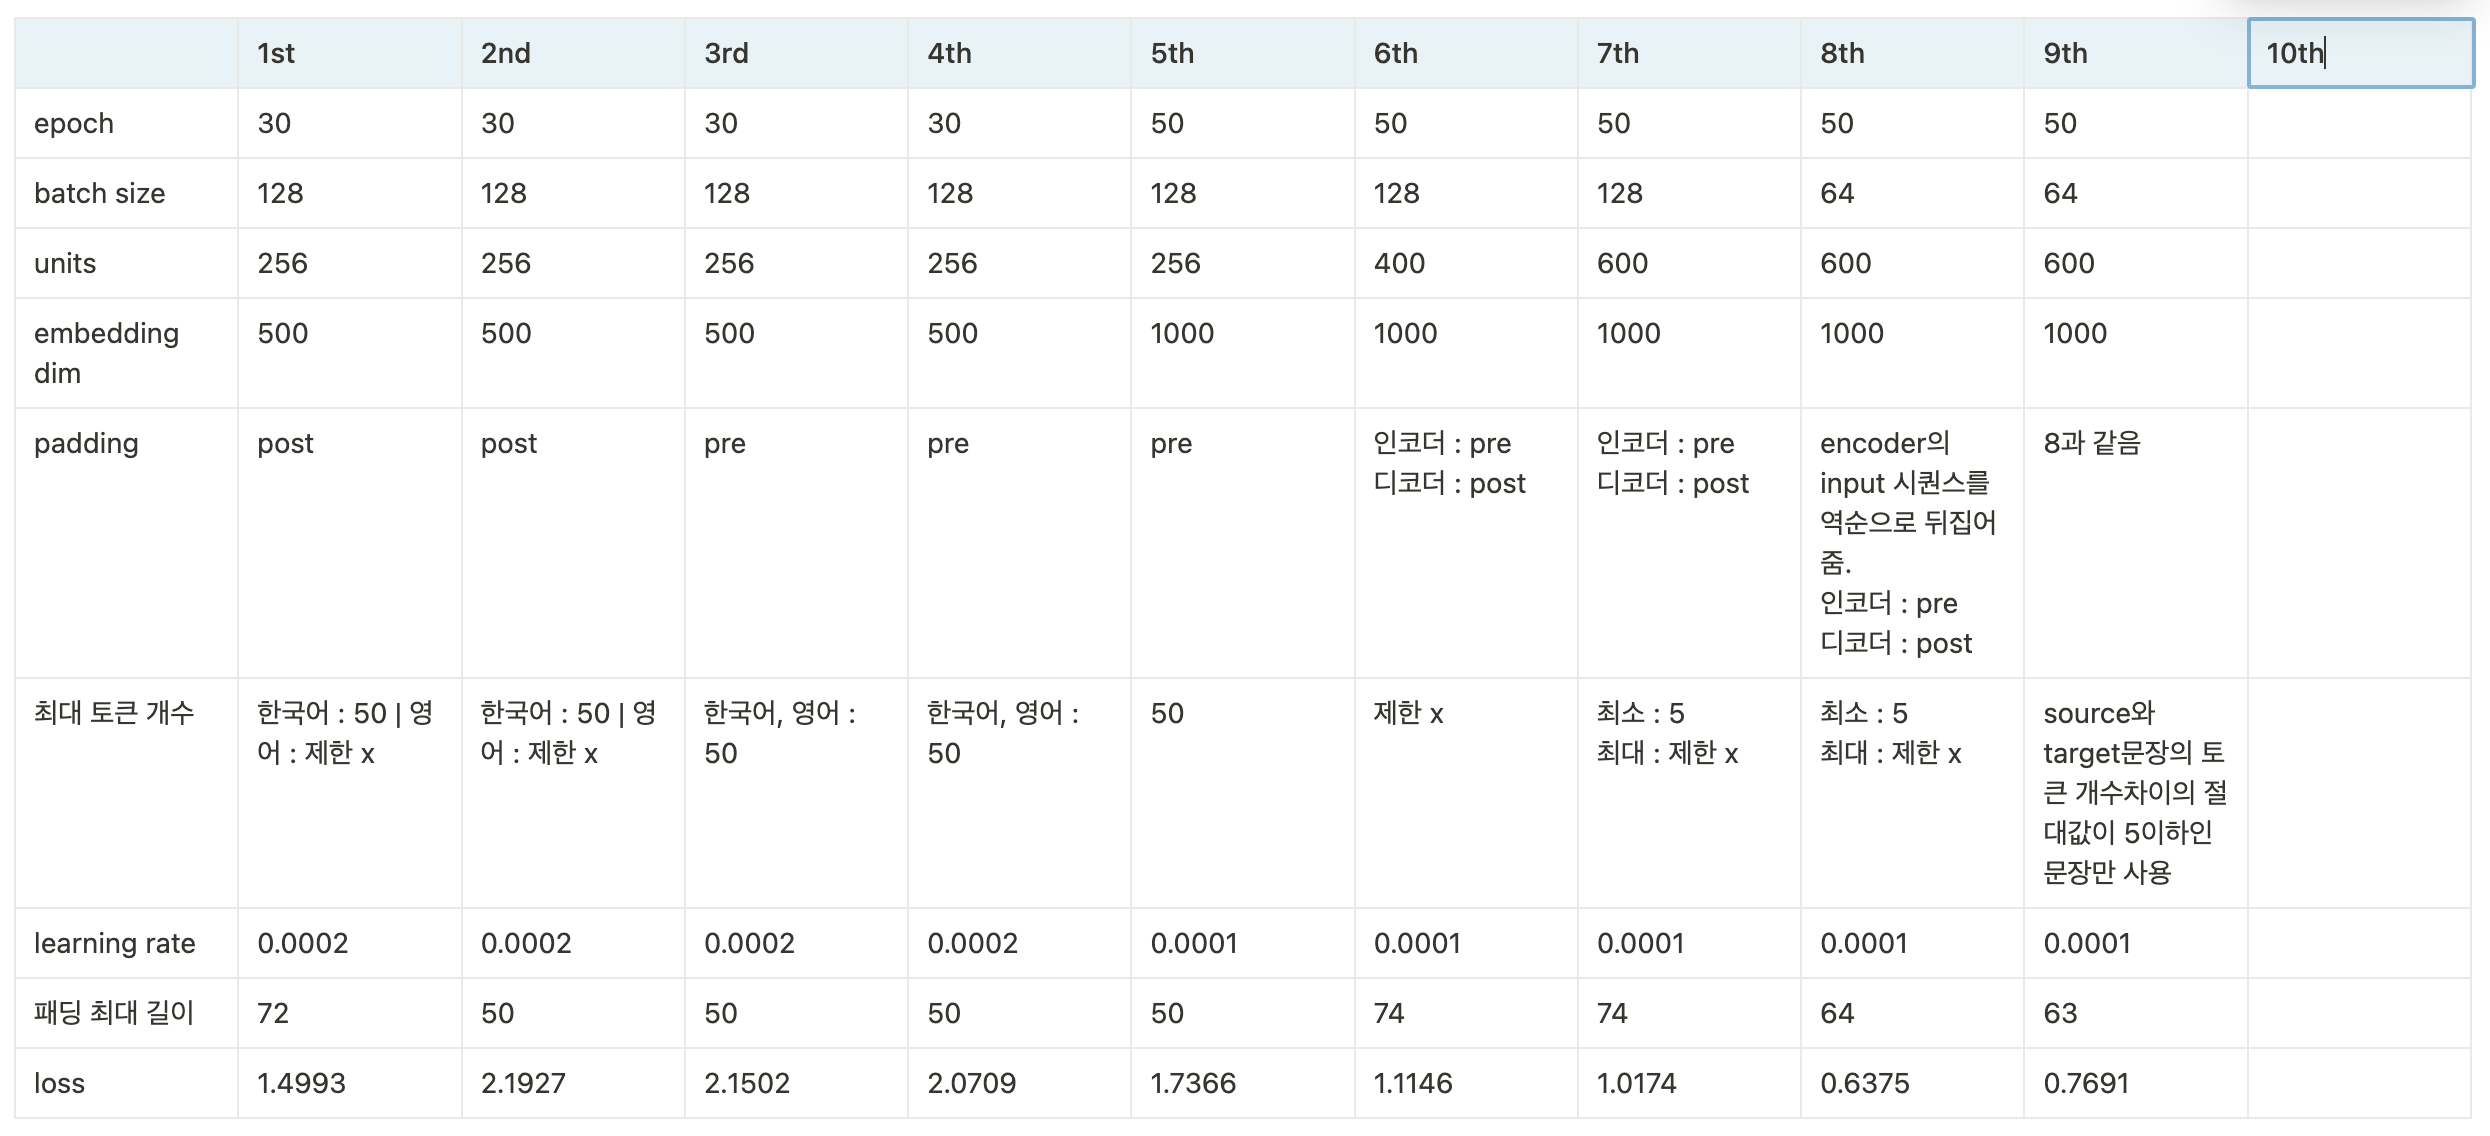